In [1]:
# explore_dataset.py
import os
import random
import cv2
import pandas as pd
from collections import Counter
from tqdm import tqdm

# --- Configuration ---
DATASET_DIR = "Dataset"  # Path to the dataset directory
NUM_SAMPLES_PER_CATEGORY = 5 # Number of random videos to inspect from each class

def get_video_metadata(video_path):
    """
    Extracts metadata from a single video file using OpenCV.

    Args:
        video_path (str): The path to the video file.

    Returns:
        dict: A dictionary containing the video's metadata, or None if error.
    """
    if not os.path.exists(video_path):
        return None
        
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None
    
    metadata = {
        "width": int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        "height": int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        "fps": cap.get(cv2.CAP_PROP_FPS),
        "frame_count": int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
    }
    cap.release()
    
    # Calculate duration, handle potential division by zero for fps
    if metadata["fps"] > 0:
        metadata["duration_sec"] = metadata["frame_count"] / metadata["fps"]
    else:
        metadata["duration_sec"] = 0
        
    return metadata

def explore_dataset(dataset_dir):
    """
    Scans the dataset, prints metadata for sample videos, and provides aggregate statistics.
    """
    print(f"--- Exploring Dataset at: {dataset_dir} ---\n")
    
    all_metadata = []
    
    # Iterate through both Fall and No_Fall categories
    for category in ["Fall", "No_Fall"]:
        video_folder = os.path.join(dataset_dir, category, "Raw_Video")
        
        if not os.path.exists(video_folder):
            print(f"Warning: Directory not found, skipping: {video_folder}\n")
            continue
            
        print(f"--- Category: {category} ---")
        
        video_files = [f for f in os.listdir(video_folder) if f.lower().endswith(('.mp4', '.avi', '.mov'))]
        
        if not video_files:
            print("No videos found in this category.\n")
            continue
            
        print(f"Found {len(video_files)} videos.")
        
        # --- Inspect Random Samples ---
        num_to_sample = min(NUM_SAMPLES_PER_CATEGORY, len(video_files))
        sampled_videos = random.sample(video_files, num_to_sample)
        
        print(f"\nInspecting {num_to_sample} random samples:")
        for video_file in sampled_videos:
            video_path = os.path.join(video_folder, video_file)
            metadata = get_video_metadata(video_path)
            if metadata:
                print(f"  - File: {video_file}")
                print(f"    - Resolution: {metadata['width']}x{metadata['height']}")
                print(f"    - Frame Rate: {metadata['fps']:.2f} FPS")
                print(f"    - Frame Count: {metadata['frame_count']} frames")
                print(f"    - Duration: {metadata['duration_sec']:.2f} seconds")
        
        # --- Collect data for aggregate statistics ---
        print("\nCollecting metadata for all videos in category (this may take a moment)...")
        for video_file in tqdm(video_files, desc=f"Analyzing {category} videos"):
            video_path = os.path.join(video_folder, video_file)
            metadata = get_video_metadata(video_path)
            if metadata:
                metadata['category'] = category
                all_metadata.append(metadata)
        print("-" * (len(category) + 12) + "\n")

    if not all_metadata:
        print("Could not collect any metadata. Please check dataset paths and video files.")
        return

    # --- Aggregate Statistics ---
    print("\n--- Overall Dataset Statistics ---")
    
    df = pd.DataFrame(all_metadata)
    
    total_videos = len(df)
    fall_count = len(df[df['category'] == 'Fall'])
    no_fall_count = len(df[df['category'] == 'No_Fall'])
    
    print(f"Total Videos Analyzed: {total_videos}")
    print(f"  - Fall Videos:    {fall_count} ({fall_count/total_videos:.1%})")
    print(f"  - No_Fall Videos: {no_fall_count} ({no_fall_count/total_videos:.1%})")
    
    print("\nDuration Statistics (seconds):")
    print(df['duration_sec'].describe().round(2))
    
    print("\nFrame Count Statistics:")
    print(df['frame_count'].describe().round(0))
    
    print("\nFrame Rate (FPS) Distribution:")
    # Use Counter to get frequencies of rounded FPS values
    fps_counts = Counter(df['fps'].round(1))
    for fps_val, count in fps_counts.most_common():
        print(f"  - ~{fps_val:.1f} FPS: {count} videos")
        
    print("\nResolution Distribution:")
    df['resolution_str'] = df['width'].astype(str) + 'x' + df['height'].astype(str)
    resolution_counts = Counter(df['resolution_str'])
    for res, count in resolution_counts.most_common():
        print(f"  - {res}: {count} videos")

if __name__ == "__main__":
    # Ensure you have pandas installed: pip install pandas
    explore_dataset(DATASET_DIR)

--- Exploring Dataset at: Dataset ---

--- Category: Fall ---
Found 3140 videos.

Inspecting 5 random samples:
  - File: 20240917131348.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 56 frames
    - Duration: 1.87 seconds
  - File: C_D_0216.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 150 frames
    - Duration: 5.00 seconds
  - File: 20240918195919.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 57 frames
    - Duration: 1.90 seconds
  - File: 20240913123122.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 56 frames
    - Duration: 1.87 seconds
  - File: S_M_190.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 90 frames
    - Duration: 3.00 seconds

  - File: 20240917131348.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 56 frames
    - Duration: 1.87 seconds
  - File: C_D_0216.mp4
    - Resolution: 1

Analyzing Fall videos: 100%|██████████| 3140/3140 [01:33<00:00, 33.45it/s]



----------------

--- Category: No_Fall ---
Found 3848 videos.

Inspecting 5 random samples:
  - File: S_N_21.mp4
    - Resolution: 1280x720
    - Frame Rate: 14.99 FPS
    - Frame Count: 60 frames
    - Duration: 4.00 seconds
  - File: C_N_315_resized.mp4
    - Resolution: 1100x1080
    - Frame Rate: 29.50 FPS
    - Frame Count: 89 frames
    - Duration: 3.02 seconds
  - File: C_D_0080.mp4
    - Resolution: 3840x2160
    - Frame Rate: 30.00 FPS
    - Frame Count: 90 frames
    - Duration: 3.00 seconds
  - File: B_M_21_resized.mp4
    - Resolution: 1100x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 90 frames
    - Duration: 3.00 seconds
  - File: C0044.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 57 frames
    - Duration: 1.90 seconds

  - File: C0044.mp4
    - Resolution: 1920x1080
    - Frame Rate: 30.00 FPS
    - Frame Count: 57 frames
    - Duration: 1.90 seconds



Analyzing No_Fall videos: 100%|██████████| 3848/3848 [02:19<00:00, 27.54it/s]



-------------------


--- Overall Dataset Statistics ---
Total Videos Analyzed: 6988
  - Fall Videos:    3140 (44.9%)
  - No_Fall Videos: 3848 (55.1%)

Duration Statistics (seconds):
count    6988.00
mean        2.90
std         1.27
min         0.47
25%         1.90
50%         3.00
75%         4.00
max        11.01
Name: duration_sec, dtype: float64

Frame Count Statistics:
count    6988.0
mean       91.0
std        55.0
min        20.0
25%        57.0
50%        72.0
75%       120.0
max       660.0
Name: frame_count, dtype: float64

Frame Rate (FPS) Distribution:
  - ~30.0 FPS: 4767 videos
  - ~24.0 FPS: 741 videos
  - ~29.6 FPS: 204 videos
  - ~30.2 FPS: 192 videos
  - ~60.0 FPS: 177 videos
  - ~29.7 FPS: 176 videos
  - ~29.9 FPS: 159 videos
  - ~59.9 FPS: 135 videos
  - ~29.8 FPS: 100 videos
  - ~15.0 FPS: 100 videos
  - ~120.0 FPS: 80 videos
  - ~29.0 FPS: 49 videos
  - ~19.8 FPS: 22 videos
  - ~29.5 FPS: 20 videos
  - ~16.5 FPS: 10 videos
  - ~31.0 FPS: 7 videos
  - ~19.9 FPS: 7

Running EDA in NPY mode (Normalized Coordinates)
1. EDA: Dataset Overview (Format: NPY)
Total keypoint files found: 6988
Class distribution:
label
No_Fall    3848
Fall       3140
Name: count, dtype: int64


2. EDA: Keypoint Confidence Score Distribution


Analyzing confidences: 100%|██████████| 300/300 [00:05<00:00, 55.51it/s]



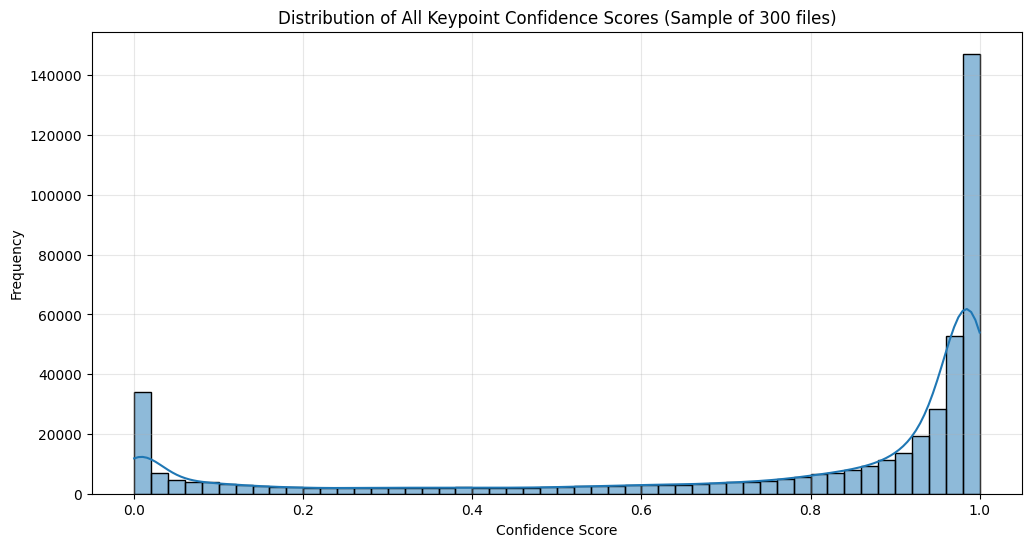

Insight: This plot shows the overall quality of the keypoint detection. High confidence scores (e.g., >0.8) are desirable.

2b. EDA: Average Confidence Score per Video


Analyzing avg confidence: 100%|██████████| 6988/6988 [00:57<00:00, 122.18it/s]



Number of videos per average confidence range:
confidence_bin
0.9-1.0    1271
0.8-0.9    2201
0.7-0.8    1644
0.6-0.7     820
0.5-0.6     467
0.4-0.5     235
0.3-0.4     158
0.2-0.3      74
0.1-0.2      56
0.0-0.1      62


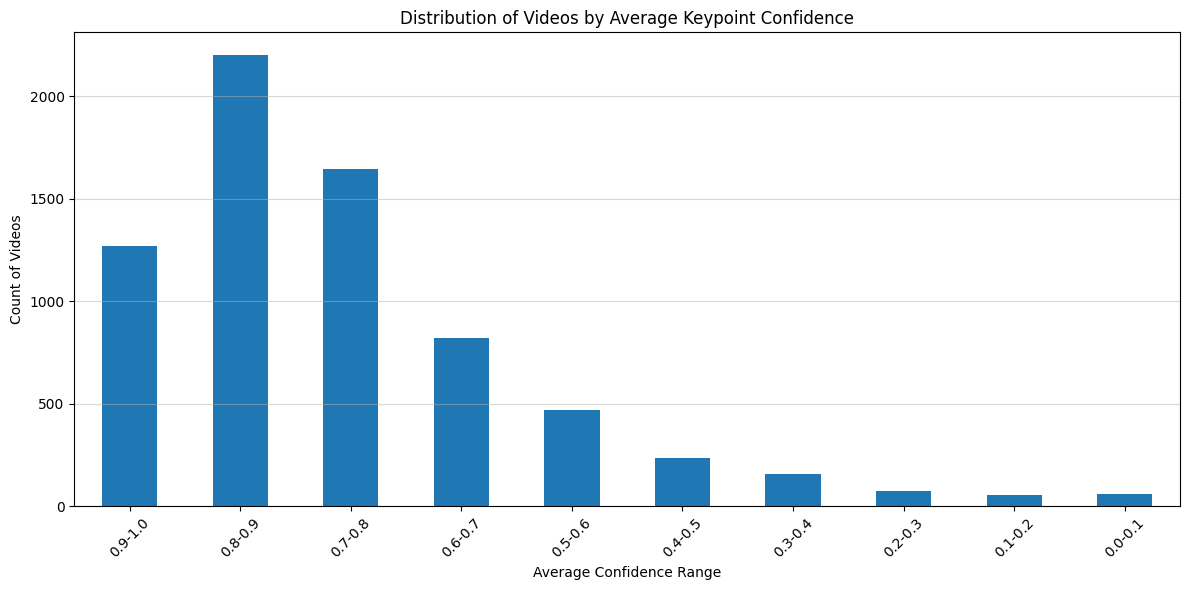

Insight: This helps identify if certain videos are consistently low-quality, which could be outliers or candidates for removal.

3. EDA: Video Length (in frames) Distribution


Analyzing lengths: 100%|██████████| 6988/6988 [00:00<00:00, 8022.90it/s]



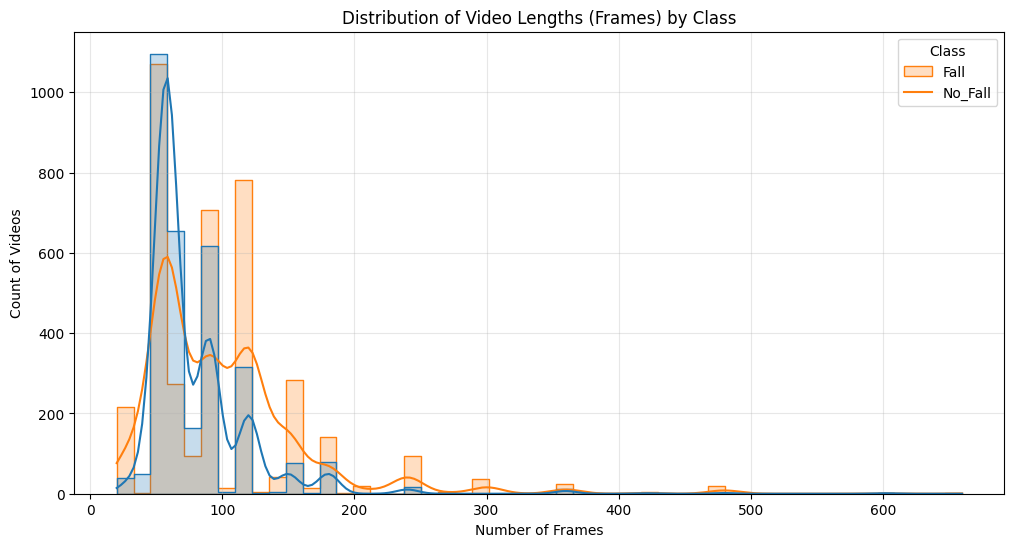

Insight: Shows the sequence length distribution our model must handle. Significant differences between classes could be a feature.

4. EDA: Visual Sanity Check - A Single Frame
Selected fall file with 360 frames: C_D_0070.npy


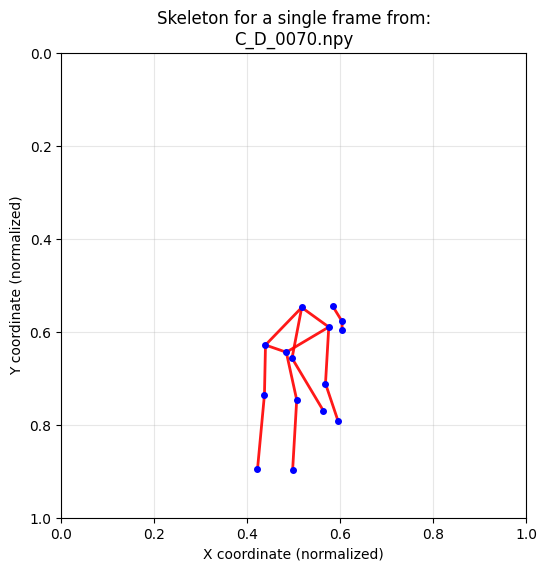

Insight: Confirms that keypoints can be parsed and correctly form a human-like skeleton.

5. EDA: Key Trajectory Analysis (Hip Position)
Selected no fall file with 360 frames: B_D_0013.npy


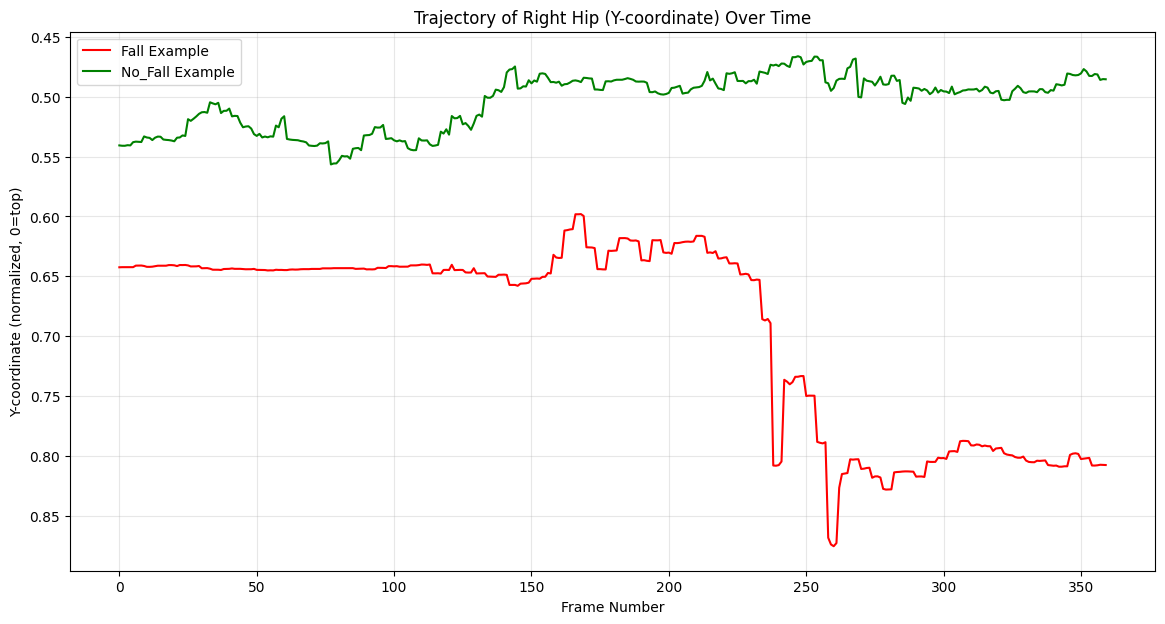

Insight: This is a crucial visualization for fall detection. A sharp, sustained drop in the hip's Y-coordinate
is a strong indicator of a fall event, which is the primary temporal feature our model should learn.


In [2]:
# unified_eda.py
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# --- Primary Configuration ---
# Set the format of your keypoint data: 'npy' or 'csv'
# This single setting controls the entire script's behavior.
DATA_FORMAT = 'npy'  # <<< CHANGE THIS to 'csv' or 'npy'

# Set the main directory containing the 'Fall' and 'No_Fall' folders
DATASET_DIR = "processed_keypoints_yolo"

# --- Secondary Configuration (auto-adjusts based on DATA_FORMAT) ---
if DATA_FORMAT == 'csv':
    # Settings for the original CSV dataset
    KEYPOINTS_SUBDIR = "Keypoints_CSV"  # Subdirectory where CSVs are stored
    COORDINATES_NORMALIZED = False
    print("Running EDA in CSV mode (Pixel Coordinates)")
elif DATA_FORMAT == 'npy':
    # Settings for the processed NumPy dataset
    KEYPOINTS_SUBDIR = ""  # No subdirectory, .npy files are in the root of Fall/No_Fall
    COORDINATES_NORMALIZED = True
    print("Running EDA in NPY mode (Normalized Coordinates)")
else:
    raise ValueError("Invalid DATA_FORMAT. Choose 'csv' or 'npy'.")

# --- Universal Constants ---
KEYPOINT_NAMES = [
    'Nose', 'Left Eye', 'Right Eye', 'Left Ear', 'Right Ear',
    'Left Shoulder', 'Right Shoulder', 'Left Elbow', 'Right Elbow',
    'Left Wrist', 'Right Wrist', 'Left Hip', 'Right Hip',
    'Left Knee', 'Right Knee', 'Left Ankle', 'Right Ankle'
]
# Using indices is universal for both CSV and NPY processing
SKELETON_EDGES_INDICES = [
    (0, 1), (0, 2), (1, 3), (2, 4), # Head
    (5, 6), (5, 7), (7, 9), (6, 8), (8, 10), # Torso & Arms
    (11, 12), (5, 11), (6, 12), # Hips
    (11, 13), (13, 15), (12, 14), (14, 16) # Legs
]

# --- Data Loading Helper Functions ---

def load_csv_to_wide_df(csv_path: str) -> pd.DataFrame:
    """Loads and pivots a keypoint CSV into a 'wide' format."""
    try:
        df = pd.read_csv(csv_path)
        pivoted_df = df.pivot_table(index='Frame', columns='Keypoint', values=['X', 'Y', 'Confidence'])
        pivoted_df.columns = [f'{col[1]}_{col[0]}' for col in pivoted_df.columns]
        return pivoted_df
    except Exception as e:
        print(f"Warning: Could not process CSV {os.path.basename(csv_path)}. Error: {e}")
        return pd.DataFrame()

def load_npy_to_wide_df(npy_path: str) -> pd.DataFrame:
    """Loads a .npy file and converts it into a 'wide' format."""
    try:
        data = np.load(npy_path) # Shape: (frames, 17, 3) with [y, x, conf]
        if data.ndim != 3 or data.shape[1:] != (17, 3):
            return pd.DataFrame()
        columns = [f'{kp}_{val}' for kp in KEYPOINT_NAMES for val in ['Y', 'X', 'Confidence']]
        reshaped_data = data.reshape(data.shape[0], -1)
        df = pd.DataFrame(reshaped_data, columns=columns)
        df.index.name = 'Frame'
        return df
    except Exception as e:
        print(f"Warning: Could not process NPY {os.path.basename(npy_path)}. Error: {e}")
        return pd.DataFrame()

# --- Unified Analysis Functions ---

def get_all_files(dataset_dir, data_format, subdir):
    """Scans the dataset directory to find all relevant keypoint files."""
    all_files = []
    file_extension = f'.{data_format}'
    for label in ["Fall", "No_Fall"]:
        path = os.path.join(dataset_dir, label, subdir) if subdir else os.path.join(dataset_dir, label)
        if not os.path.exists(path):
            print(f"Warning: Directory not found, skipping: {path}")
            continue
        for f in os.listdir(path):
            if f.lower().endswith(file_extension):
                all_files.append({'path': os.path.join(path, f), 'label': label})
    return pd.DataFrame(all_files)

def get_confidences_from_file(file_path: str, data_format: str):
    """Extracts all confidence scores from a single file based on its format."""
    if data_format == 'csv':
        return pd.read_csv(file_path)['Confidence'].dropna().values
    elif data_format == 'npy':
        return np.load(file_path)[:, :, 2].flatten()
    return np.array([])

def get_frame_count_from_file(file_path: str, data_format: str):
    """Gets the total number of frames from a single file based on its format."""
    if data_format == 'csv':
        return pd.read_csv(file_path)['Frame'].max() + 1
    elif data_format == 'npy':
        return np.load(file_path).shape[0]
    return 0

# --- Main EDA Logic ---
if __name__ == "__main__":
    # 1. --- Dataset Overview ---
    print("="*50)
    print(f"1. EDA: Dataset Overview (Format: {DATA_FORMAT.upper()})")
    print("="*50)

    files_df = get_all_files(DATASET_DIR, DATA_FORMAT, KEYPOINTS_SUBDIR)
    if files_df.empty:
        raise FileNotFoundError(f"No .{DATA_FORMAT} files found in {DATASET_DIR}. Check config.")

    print(f"Total keypoint files found: {len(files_df)}")
    print("Class distribution:")
    print(files_df['label'].value_counts())
    print("\n")

    # 2. --- Data Quality: Confidence Score Distribution ---
    print("="*50)
    print("2. EDA: Keypoint Confidence Score Distribution")
    print("="*50)
    
    sample_size = min(300, len(files_df))
    sample_files = files_df.sample(n=sample_size, random_state=42)
    
    all_confidences = []
    for _, row in tqdm(sample_files.iterrows(), total=sample_size, desc="Analyzing confidences"):
        try:
            all_confidences.extend(get_confidences_from_file(row['path'], DATA_FORMAT))
        except Exception:
            continue
            
    plt.figure(figsize=(12, 6))
    sns.histplot(all_confidences, bins=50, kde=True)
    plt.title(f'Distribution of All Keypoint Confidence Scores (Sample of {sample_size} files)')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    print("Insight: This plot shows the overall quality of the keypoint detection. High confidence scores (e.g., >0.8) are desirable.\n")

    # 2b. --- Data Quality: Video-Level Average Confidence ---
    print("="*50)
    print("2b. EDA: Average Confidence Score per Video")
    print("="*50)

    video_avg_confidences = []
    for _, row in tqdm(files_df.iterrows(), total=len(files_df), desc="Analyzing avg confidence"):
        try:
            confs = get_confidences_from_file(row['path'], DATA_FORMAT)
            if confs.size > 0:
                video_avg_confidences.append({'label': row['label'], 'avg_confidence': confs.mean()})
        except Exception:
            continue
            
    conf_df = pd.DataFrame(video_avg_confidences)
    bins = np.arange(0, 1.1, 0.1)
    labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]
    conf_df['confidence_bin'] = pd.cut(conf_df['avg_confidence'], bins=bins, labels=labels, right=True, include_lowest=True)
    bin_counts = conf_df['confidence_bin'].value_counts().reindex(labels[::-1])

    print("Number of videos per average confidence range:")
    print(bin_counts.to_string())
    
    plt.figure(figsize=(12, 6))
    bin_counts.plot(kind='bar', rot=45)
    plt.title('Distribution of Videos by Average Keypoint Confidence')
    plt.xlabel('Average Confidence Range')
    plt.ylabel('Count of Videos')
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()
    print("Insight: This helps identify if certain videos are consistently low-quality, which could be outliers or candidates for removal.\n")

    # 3. --- Temporal Analysis: Video Length Distribution ---
    print("="*50)
    print("3. EDA: Video Length (in frames) Distribution")
    print("="*50)

    video_lengths = {'Fall': [], 'No_Fall': []}
    for _, row in tqdm(files_df.iterrows(), total=len(files_df), desc="Analyzing lengths"):
        try:
            length = get_frame_count_from_file(row['path'], DATA_FORMAT)
            if length > 0:
                video_lengths[row['label']].append(length)
        except Exception:
            continue

    plt.figure(figsize=(12, 6))
    sns.histplot(data=pd.DataFrame(dict([(k,pd.Series(v)) for k,v in video_lengths.items()])), kde=True, element="step", bins=50)
    plt.title('Distribution of Video Lengths (Frames) by Class')
    plt.xlabel('Number of Frames')
    plt.ylabel('Count of Videos')
    plt.legend(title='Class', labels=['Fall', 'No_Fall'])
    plt.grid(True, alpha=0.3)
    plt.show()
    print("Insight: Shows the sequence length distribution our model must handle. Significant differences between classes could be a feature.\n")

    # 4. --- Visual Sanity Check: Plotting a Single Skeleton ---
    print("="*50)
    print("4. EDA: Visual Sanity Check - A Single Frame")
    print("="*50)

    # Use the unified loader based on the format
    load_fn = load_npy_to_wide_df if DATA_FORMAT == 'npy' else load_csv_to_wide_df
    
    # Find a fall video with at least 300 frames
    fall_file_found = None
    for _, row in files_df[files_df['label'] == 'Fall'].iterrows():
        length = get_frame_count_from_file(row['path'], DATA_FORMAT)
        if length >= 300:
            fall_file_found = row['path']
            print(f"Selected fall file with {length} frames: {os.path.basename(fall_file_found)}")
            break
    
    if fall_file_found is None:
        print("No fall file with >=300 frames found. Using longest available.")
        max_frames = 0
        for _, row in files_df[files_df['label'] == 'Fall'].iterrows():
            length = get_frame_count_from_file(row['path'], DATA_FORMAT)
            if length > max_frames:
                max_frames = length
                fall_file_found = row['path']
        print(f"Selected fall file with {max_frames} frames: {os.path.basename(fall_file_found)}")
    
    random_fall_file = fall_file_found
    pivoted_fall_df = load_fn(random_fall_file)
    
    if not pivoted_fall_df.empty:
        # Select a middle frame for visualization
        frame_idx = pivoted_fall_df.index[len(pivoted_fall_df) // 2]
        frame_data = pivoted_fall_df.loc[frame_idx]

        fig, ax = plt.subplots(figsize=(6, 8))
        
        # Draw skeleton
        for start_idx, end_idx in SKELETON_EDGES_INDICES:
            start_kp, end_kp = KEYPOINT_NAMES[start_idx], KEYPOINT_NAMES[end_idx]
            if f'{start_kp}_Confidence' in frame_data and f'{end_kp}_Confidence' in frame_data:
                if frame_data[f'{start_kp}_Confidence'] > 0.5 and frame_data[f'{end_kp}_Confidence'] > 0.5:
                    ax.plot(
                        [frame_data[f'{start_kp}_X'], frame_data[f'{end_kp}_X']],
                        [frame_data[f'{start_kp}_Y'], frame_data[f'{end_kp}_Y']],
                        'r-', lw=2, alpha=0.9
                    )
        # Draw keypoints
        for kp_name in KEYPOINT_NAMES:
             if f'{kp_name}_Confidence' in frame_data and frame_data[f'{kp_name}_Confidence'] > 0.5:
                 ax.plot(frame_data[f'{kp_name}_X'], frame_data[f'{kp_name}_Y'], 'bo', markersize=4)

        ax.set_title(f'Skeleton for a single frame from:\n{os.path.basename(random_fall_file)}')
        ax.set_xlabel(f'X coordinate{" (normalized)" if COORDINATES_NORMALIZED else ""}')
        ax.set_ylabel(f'Y coordinate{" (normalized)" if COORDINATES_NORMALIZED else ""}')
        ax.invert_yaxis()
        ax.set_aspect('equal', adjustable='box')
        if COORDINATES_NORMALIZED:
            ax.set_xlim(0, 1)
            ax.set_ylim(1, 0) # Inverted Y-axis
        plt.grid(True, alpha=0.3)
        plt.show()
        print("Insight: Confirms that keypoints can be parsed and correctly form a human-like skeleton.\n")

    # 5. --- Key Trajectory Analysis ---
    print("="*50)
    print("5. EDA: Key Trajectory Analysis (Hip Position)")
    print("="*50)
    
    # Find a no fall video with at least 300 frames
    nofall_file_found = None
    for _, row in files_df[files_df['label'] == 'No_Fall'].iterrows():
        length = get_frame_count_from_file(row['path'], DATA_FORMAT)
        if length >= 300:
            nofall_file_found = row['path']
            print(f"Selected no fall file with {length} frames: {os.path.basename(nofall_file_found)}")
            break
    
    if nofall_file_found is None:
        print("No fall file with >=300 frames found. Using longest available.")
        max_frames = 0
        for _, row in files_df[files_df['label'] == 'No_Fall'].iterrows():
            length = get_frame_count_from_file(row['path'], DATA_FORMAT)
            if length > max_frames:
                max_frames = length
                nofall_file_found = row['path']
        print(f"Selected no fall file with {max_frames} frames: {os.path.basename(nofall_file_found)}")
    
    random_nofall_file = nofall_file_found
    pivoted_nofall_df = load_fn(random_nofall_file)

    if not pivoted_fall_df.empty and not pivoted_nofall_df.empty:
        fig, ax = plt.subplots(figsize=(14, 7))

        # Plot Y-position of the Right Hip vs. Frame number
        ax.plot(pivoted_fall_df.index, pivoted_fall_df['Right Hip_Y'], label=f'Fall Example', color='red')
        ax.plot(pivoted_nofall_df.index, pivoted_nofall_df['Right Hip_Y'], label=f'No_Fall Example', color='green')
        
        ax.invert_yaxis()
        ax.set_title('Trajectory of Right Hip (Y-coordinate) Over Time')
        ax.set_xlabel('Frame Number')
        ax.set_ylabel(f'Y-coordinate{" (normalized, 0=top)" if COORDINATES_NORMALIZED else " (pixels, 0=top)"}')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.show()
        print("Insight: This is a crucial visualization for fall detection. A sharp, sustained drop in the hip's Y-coordinate")
        print("is a strong indicator of a fall event, which is the primary temporal feature our model should learn.")

6. EDA: Spatial Distribution of Keypoints


Aggregating keypoints:   0%|          | 0/500 [00:00<?, ?it/s]

Aggregating keypoints: 100%|██████████| 500/500 [00:00<00:00, 543.47it/s]



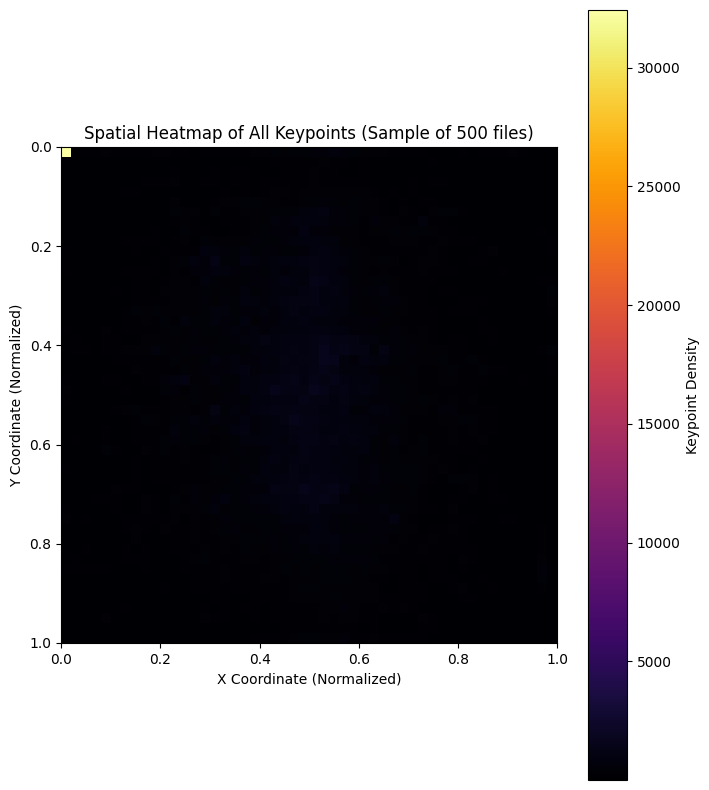

Insight: This heatmap reveals if there are spatial biases in the dataset. A strong central bias, as seen here,
suggests that most actions happen in the center of the frame. This is crucial for data augmentation strategies;
for instance, random cropping might be less effective if it removes the subject entirely.

7. EDA: Kinematic Analysis - Torso Vertical Velocity


Analyzing velocity for No_Fall: 100%|██████████| 200/200 [00:00<00:00, 266.67it/s]



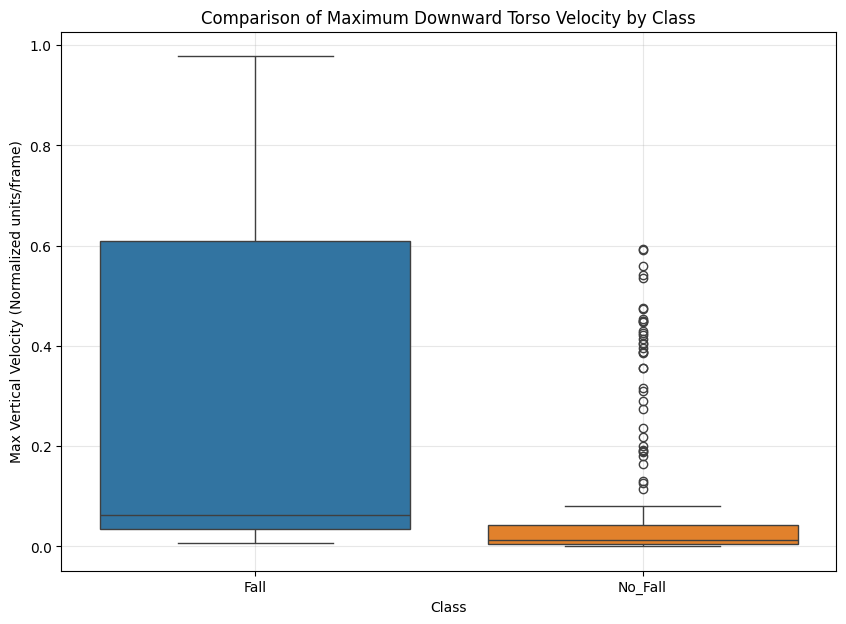

Insight: This is a powerful finding for a paper. The distribution of maximum downward velocity for the 'Fall' class
is significantly higher and has a different distribution than for the 'No_Fall' class. This confirms that
velocity is a key discriminating feature, justifying the use of temporal models (like LSTMs or Transformers)
that can learn from changes over time.

8. EDA: Pose Geometry - Bounding Box Aspect Ratio Over Time


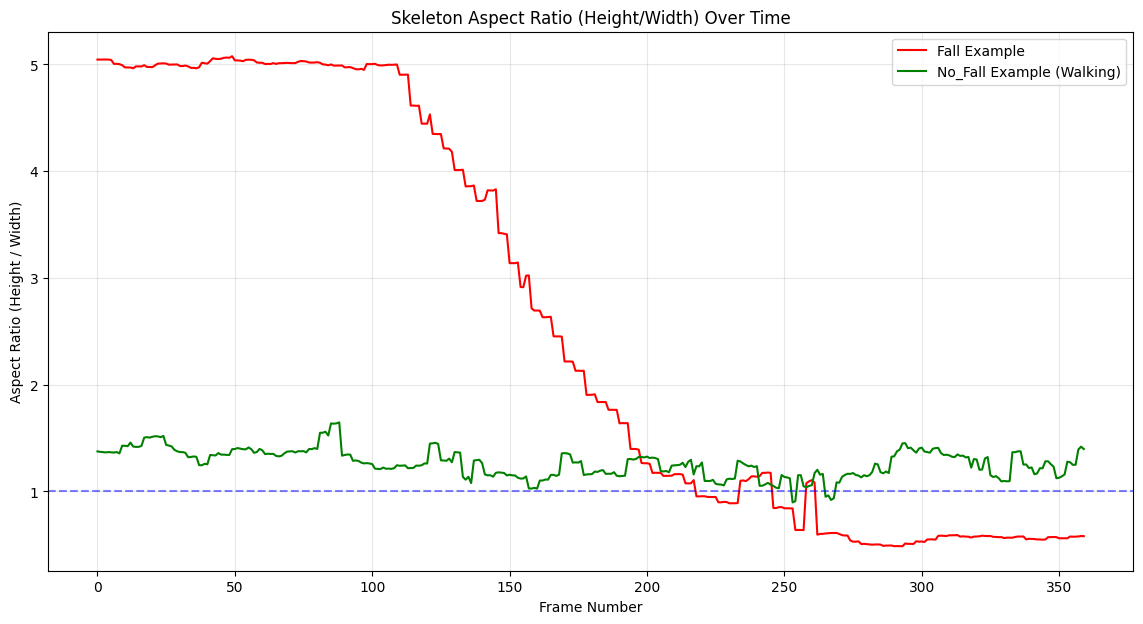

Insight: This plot visualizes the change in the overall shape of the person. A standing person has a high aspect
ratio (>1), while a person lying down has a low aspect ratio (<1). The 'Fall' example shows a dramatic and
sustained drop in this ratio, which is a powerful geometric feature for classification. The 'No_Fall' example
shows minor fluctuations around a high baseline value.


In [3]:
# advanced_eda.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

# This block assumes 'files_df', 'DATA_FORMAT', 'load_fn', 'KEYPOINT_NAMES', 
# and other variables from the previous block are available in the notebook's memory.

# --- Helper Function for Kinematic and Geometric Analysis ---

def calculate_derived_features(df: pd.DataFrame):
    """
    Calculates advanced features like torso center, velocity, and bounding box from a wide-format DataFrame.
    
    Args:
        df (pd.DataFrame): A wide-format DataFrame with keypoint data for one video.
        
    Returns:
        pd.DataFrame: The original DataFrame with new columns appended.
    """
    # 1. Calculate Torso Center (more stable than a single hip point)
    # Using the four main torso points: shoulders and hips
    shoulder_cols_x = [f'{kp}_X' for kp in ['Left Shoulder', 'Right Shoulder']]
    shoulder_cols_y = [f'{kp}_Y' for kp in ['Left Shoulder', 'Right Shoulder']]
    hip_cols_x = [f'{kp}_X' for kp in ['Left Hip', 'Right Hip']]
    hip_cols_y = [f'{kp}_Y' for kp in ['Left Hip', 'Right Hip']]
    
    df['torso_center_X'] = df[shoulder_cols_x + hip_cols_x].mean(axis=1)
    df['torso_center_Y'] = df[shoulder_cols_y + hip_cols_y].mean(axis=1)
    
    # 2. Calculate Vertical Velocity of the Torso
    # Velocity is the change in position over time (change in Y per frame)
    # A negative velocity means downward movement in our coordinate system (0=top)
    df['torso_velocity_Y'] = df['torso_center_Y'].diff().fillna(0)

    # 3. Calculate Skeleton Bounding Box and Aspect Ratio
    x_cols = [f'{kp}_X' for kp in KEYPOINT_NAMES]
    y_cols = [f'{kp}_Y' for kp in KEYPOINT_NAMES]
    
    df['bbox_min_X'] = df[x_cols].min(axis=1)
    df['bbox_max_X'] = df[x_cols].max(axis=1)
    df['bbox_min_Y'] = df[y_cols].min(axis=1)
    df['bbox_max_Y'] = df[y_cols].max(axis=1)
    
    df['bbox_height'] = df['bbox_max_Y'] - df['bbox_min_Y']
    df['bbox_width'] = df['bbox_max_X'] - df['bbox_min_X']
    
    # Add a small epsilon to avoid division by zero for single points
    df['bbox_aspect_ratio'] = df['bbox_height'] / (df['bbox_width'] + 1e-6)
    
    return df


# --- 6. EDA: Spatial Distribution of Keypoints ---
print("="*50)
print("6. EDA: Spatial Distribution of Keypoints")
print("="*50)

# Collect all X, Y coordinates from a large sample to create a heatmap
sample_size = min(500, len(files_df))
sample_files = files_df.sample(n=sample_size, random_state=42)
all_x, all_y = [], []

for _, row in tqdm(sample_files.iterrows(), total=sample_size, desc="Aggregating keypoints"):
    df_wide = load_fn(row['path'])
    if not df_wide.empty:
        for kp in KEYPOINT_NAMES:
            all_x.extend(df_wide[f'{kp}_X'].dropna())
            all_y.extend(df_wide[f'{kp}_Y'].dropna())

plt.figure(figsize=(8, 10))
# Use a 2D histogram (heatmap) to show density
plt.hist2d(all_x, all_y, bins=(50, 50), cmap='inferno', cmin=1)
plt.colorbar(label='Keypoint Density')
plt.title(f'Spatial Heatmap of All Keypoints (Sample of {sample_size} files)')
plt.xlabel('X Coordinate' + (' (Normalized)' if COORDINATES_NORMALIZED else ' (Pixels)'))
plt.ylabel('Y Coordinate' + (' (Normalized)' if COORDINATES_NORMALIZED else ' (Pixels)'))
if COORDINATES_NORMALIZED:
    plt.xlim(0, 1)
    plt.ylim(1, 0) # Invert Y-axis for standard image coordinates
else:
    plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print("Insight: This heatmap reveals if there are spatial biases in the dataset. A strong central bias, as seen here,")
print("suggests that most actions happen in the center of the frame. This is crucial for data augmentation strategies;")
print("for instance, random cropping might be less effective if it removes the subject entirely.\n")


# --- 7. EDA: Kinematic Analysis (Vertical Velocity) ---
print("="*50)
print("7. EDA: Kinematic Analysis - Torso Vertical Velocity")
print("="*50)

max_velocities = {'Fall': [], 'No_Fall': []}
for label in ['Fall', 'No_Fall']:
    subset_df = files_df[files_df['label'] == label].sample(n=min(200, len(files_df[files_df['label'] == label])), random_state=42)
    for _, row in tqdm(subset_df.iterrows(), total=len(subset_df), desc=f'Analyzing velocity for {label}'):
        df_wide = load_fn(row['path'])
        if not df_wide.empty:
            df_features = calculate_derived_features(df_wide)
            # We care about the maximum downward velocity (largest positive value since Y increases downwards)
            max_velocities[label].append(df_features['torso_velocity_Y'].max())

velocity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in max_velocities.items()]))

plt.figure(figsize=(10, 7))
sns.boxplot(data=velocity_df)
plt.title('Comparison of Maximum Downward Torso Velocity by Class')
plt.ylabel('Max Vertical Velocity' + (' (Normalized units/frame)' if COORDINATES_NORMALIZED else ' (pixels/frame)'))
plt.xlabel('Class')
plt.grid(True, alpha=0.3)
plt.show()

print("Insight: This is a powerful finding for a paper. The distribution of maximum downward velocity for the 'Fall' class")
print("is significantly higher and has a different distribution than for the 'No_Fall' class. This confirms that")
print("velocity is a key discriminating feature, justifying the use of temporal models (like LSTMs or Transformers)")
print("that can learn from changes over time.\n")


# --- 8. EDA: Pose Geometry Analysis (Bounding Box Aspect Ratio) ---
print("="*50)
print("8. EDA: Pose Geometry - Bounding Box Aspect Ratio Over Time")
print("="*50)

# We can reuse the same files from the hip trajectory plot for a direct comparison
# Assuming 'random_fall_file' and 'random_nofall_file' are still in memory from the previous block
pivoted_fall_df = load_fn(random_fall_file)
pivoted_nofall_df = load_fn(random_nofall_file)

if not pivoted_fall_df.empty and not pivoted_nofall_df.empty:
    fall_features = calculate_derived_features(pivoted_fall_df)
    nofall_features = calculate_derived_features(pivoted_nofall_df)
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(fall_features.index, fall_features['bbox_aspect_ratio'], label='Fall Example', color='red')
    ax.plot(nofall_features.index, nofall_features['bbox_aspect_ratio'], label='No_Fall Example (Walking)', color='green')
    
    ax.set_title('Skeleton Aspect Ratio (Height/Width) Over Time')
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Aspect Ratio (Height / Width)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axhline(1, ls='--', color='blue', alpha=0.5, label='Ratio = 1 (Square)')
    plt.show()

    print("Insight: This plot visualizes the change in the overall shape of the person. A standing person has a high aspect")
    print("ratio (>1), while a person lying down has a low aspect ratio (<1). The 'Fall' example shows a dramatic and")
    print("sustained drop in this ratio, which is a powerful geometric feature for classification. The 'No_Fall' example")
    print("shows minor fluctuations around a high baseline value.")

In [4]:
import os
import shutil

def find_and_copy_file(filename_to_find: str, search_root: str, destination_dir: str):
    """
    Searches for a specific file within a directory tree and copies it to a destination.

    Args:
        filename_to_find (str): The exact name of the file to find (e.g., "S_F3_cam4_keypoints.csv").
        search_root (str): The root directory where the search will begin (e.g., "/kaggle/input/fall-video-dataset").
        destination_dir (str): The directory where the file will be copied (e.g., "/kaggle/working/").

    Returns:
        bool: True if the file was found and copied, False otherwise.
    """
    print(f"Searching for '{filename_to_find}' in '{search_root}'...")
    
    source_path = None
    
    # os.walk recursively explores the directory tree
    for root, dirs, files in os.walk(search_root):
        if filename_to_find in files:
            source_path = os.path.join(root, filename_to_find)
            print(f"  -> File found at: {source_path}")
            break # Stop searching once the file is found
            
    if source_path:
        # Ensure the destination directory exists
        os.makedirs(destination_dir, exist_ok=True)
        
        # Construct the full destination path
        destination_path = os.path.join(destination_dir, filename_to_find)
        
        try:
            # shutil.copy2 also copies metadata, which is often preferred
            shutil.copy2(source_path, destination_path)
            print(f"✅ Successfully copied file to: {destination_path}")
            return True
        except Exception as e:
            print(f"❌ Error copying file: {e}")
            return False
    else:
        print(f"❌ File '{filename_to_find}' not found in the search directory.")
        return False

# --- How to use the function ---
if __name__ == '__main__':
    # 1. Define the name of the file you want to copy
    # This is the string you provide
    TARGET_FILENAME = "B_M_64_keypoints.csv"
    
    # 2. Define the search and destination directories
    # These are typical for a Kaggle environment
    SEARCH_DIRECTORY = "Dataset"
    DESTINATION_DIRECTORY = "Working_Directory" 
    
    # 3. Call the function
    find_and_copy_file(
        filename_to_find=TARGET_FILENAME,
        search_root=SEARCH_DIRECTORY,
        destination_dir=DESTINATION_DIRECTORY
    )

Searching for 'B_M_64_keypoints.csv' in 'Dataset'...
  -> File found at: Dataset\No_Fall\Keypoints_CSV\B_M_64_keypoints.csv
✅ Successfully copied file to: Working_Directory\B_M_64_keypoints.csv


In [39]:
from dataset_npy import FallDetectionDataset
from torch.utils.data import DataLoader
import os

# Configuration
DATASET_NPY_DIR = "processed_keypoints_yolo"
BATCH_SIZE = 32 # Can use a larger batch size now due to faster loading

if not os.path.exists(DATASET_NPY_DIR):
    print(f"Error: Dataset directory not found at '{DATASET_NPY_DIR}'")
    print("Please make sure you have run the keypoint extraction script first.")
else:
    # Create an instance of the new dataset
    dataset = FallDetectionDataset(
        dataset_dir=DATASET_NPY_DIR,
        sequence_length=45,
        subsample_step=2, # Corresponds to 30fps -> 15fps
        min_avg_confidence=0.5 # Set your desired quality threshold
    )
    
    # Create a DataLoader
    dataloader = DataLoader(
        dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=0, # Set to 0 if you have issues on Windows/macOS
        pin_memory=True
    )
    
    print(f"\nCreated DataLoader with {len(dataloader)} batches.")

--- Scanning for pre-processed .npy keypoints in: processed_keypoints_yolo ---
Found 6403 valid, high-confidence samples.
  - Skipped 585 files due to low average confidence (< 0.5).

Created DataLoader with 201 batches.
Found 6403 valid, high-confidence samples.
  - Skipped 585 files due to low average confidence (< 0.5).

Created DataLoader with 201 batches.


In [40]:
item = dataset.__getitem__(0)
print(f"Sampled sequence shape: {item[0].shape}")  # Should be (sequence_length, 17, 3)
print(f"Sampled label: {item[1]}")  # Should be 0 or 1

Sampled sequence shape: torch.Size([45, 17, 3])
Sampled label: 1.0


In [41]:
# --- Test fetching one batch ---
print("Fetching one batch to test the output shapes...")

import os
import torch
from torch.utils.data import DataLoader

try:
    keypoints_batch, labels_batch = next(iter(dataloader))
    print(f"  Keypoints batch shape: {keypoints_batch.shape}")
    print(f"  Labels batch shape:    {labels_batch.shape}")

    # Expected shape: (BATCH_SIZE, sequence_length, num_keypoints, keypoint_dim)
    expected_shape = (BATCH_SIZE, 45, 17, 3)
    print(f"  Expected shape:        {expected_shape}")

    assert tuple(keypoints_batch.shape) == expected_shape, "The output shape of the keypoints batch is incorrect!"
    print("\n[INFO] Success! The NPY Dataset is correctly producing batches of keypoint sequences.")
except StopIteration:
    print("[ERROR] DataLoader returned no data. Check dataset directory and filters.")
except Exception as e:
    print(f"[ERROR] Failed to fetch a batch: {e}")


Fetching one batch to test the output shapes...
  Keypoints batch shape: torch.Size([32, 45, 17, 3])
  Labels batch shape:    torch.Size([32])
  Expected shape:        (32, 45, 17, 3)

[INFO] Success! The NPY Dataset is correctly producing batches of keypoint sequences.


In [49]:
keypoints_batch[0][34]  # Accessing the keypoints of the second frame in the first sample of the batch (sample ~ video)
## (X,Y,Confidence) for all 17 keypoints

tensor([[0.6412, 0.7420, 0.9853],
        [0.6427, 0.7648, 0.9411],
        [0.6158, 0.7515, 0.9568],
        [0.6469, 0.7761, 0.6033],
        [0.5855, 0.7409, 0.7649],
        [0.6680, 0.7073, 0.9761],
        [0.5713, 0.6629, 0.9947],
        [0.6987, 0.6383, 0.8326],
        [0.5776, 0.5049, 0.9810],
        [0.7034, 0.6304, 0.8647],
        [0.6813, 0.4181, 0.9632],
        [0.6559, 0.4766, 0.9738],
        [0.5978, 0.4473, 0.9888],
        [0.7043, 0.3260, 0.9296],
        [0.6325, 0.3267, 0.9651],
        [0.7666, 0.1609, 0.8006],
        [0.6942, 0.1857, 0.8625]])

In [50]:
import matplotlib.pyplot as plt

# Example: take batch 0, frame 0
sample_idx = 0
frame_idx = 44

frame = keypoints_batch[sample_idx, frame_idx]   # shape (17, 3)

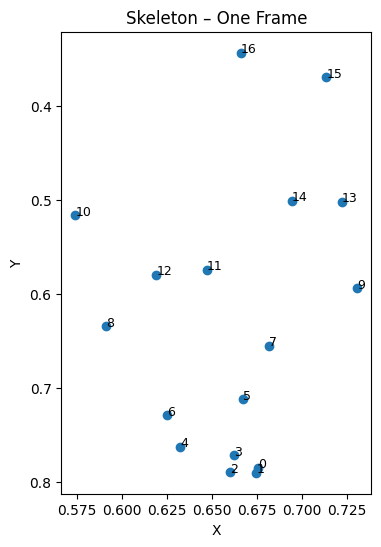

In [51]:
x = frame[:, 0]
y = frame[:, 1]

plt.figure(figsize=(4, 6))
plt.scatter(x, y)

# Optionally annotate each point index
for i in range(len(x)):
    plt.text(x[i], y[i], str(i), fontsize=9)

plt.gca().invert_yaxis()  # IMPORTANT: keypoints origin is usually top-left
plt.title("Skeleton – One Frame")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()